# ACA3 Clustering

## Author: Tianyi DAI 

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

## 1 Preprocess

## 1.1 Read Data

In [110]:
college = pd.read_csv("CollegeScorecard.csv")
college

/Users/shelly/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


## 1.2 Select Variables 

Since "outcomes, access services, affordable housing near high-quality school and safe neighborhoods that have access to transit and employmentThe" are considered by students and families, the variables I need are:  
1.UNITID (the unique college/university I.D. variable)  
2.CITY  
3.PREDDEG(Predominant degree awarded)  
4.LOCALE(Locale of institution)  
5.LATITUDE,LONGITUDE  
6.COSTT4_A,COSTT4_P(Average cost of attendance (academic/program year institutions))  
7.C150_4,C150_L4(Completion rate for first-time, full-time students at four-year/less-than-four-year institutions (150% of expected time to completion/6 years)  
8.INC_PCT_LO(Percentage of aided students whose family income is between 0-30,000)  
9.LO_INC_RPY_3YR_N,LO_INC_RPY_5YR_N,LO_INC_RPY_7YR_N(Number of students in the 3-year/5-year/7-year repayment rate of low-income (less than 30,000 in nominal family income) students cohort)  
10.LO_INC_RPY_3YR_RT_SUPP(3-year repayment rate for low-income (less than $30,000 in nominal family income) students, suppressed for n=30)

In [111]:
col_n = ['UNITID','PREDDEG','LOCALE','LATITUDE','LONGITUDE','COSTT4_A','COSTT4_P','C150_4','C150_L4','INC_PCT_LO','LO_INC_RPY_3YR_N','LO_INC_RPY_5YR_N','LO_INC_RPY_7YR_N']
college_lc = pd.DataFrame(college,columns = col_n)

In [112]:
college_lc

,UNITID,PREDDEG,LOCALE,LATITUDE,LONGITUDE,COSTT4_A,COSTT4_P,C150_4,C150_L4,INC_PCT_LO,LO_INC_RPY_3YR_N,LO_INC_RPY_5YR_N,LO_INC_RPY_7YR_N
0,100654,3,12.0,34.7834,-86.5685,18888.0,NaN,0.2914,NaN,PrivacySuppressed,1225,1309,1706
1,100663,3,12.0,33.5022,-86.8092,19990.0,NaN,0.5377,NaN,PrivacySuppressed,1748,1644,1976
2,100690,3,12.0,32.3626,-86.1740,12300.0,NaN,0.6667,NaN,PrivacySuppressed,174,166,166
3,100706,3,12.0,34.7228,-86.6384,20306.0,NaN,0.4835,NaN,0.488624612,883,798,758
4,100724,3,12.0,32.3643,-86.2957,17400.0,NaN,0.2517,NaN,0.688963211,1885,1997,2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,1682,1324,1282
7800,48285704,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,1682,1324,1282
7801,48285705,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,1682,1324,1282
7802,48285706,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,1682,1324,1282


## 1.3 Covert NA to 0

In [113]:
college_lc =college_lc.fillna(0)

In [114]:
college_lc

,UNITID,PREDDEG,LOCALE,LATITUDE,LONGITUDE,COSTT4_A,COSTT4_P,C150_4,C150_L4,INC_PCT_LO,LO_INC_RPY_3YR_N,LO_INC_RPY_5YR_N,LO_INC_RPY_7YR_N
0,100654,3,12.0,34.7834,-86.5685,18888.0,0.0,0.2914,0.0,PrivacySuppressed,1225,1309,1706
1,100663,3,12.0,33.5022,-86.8092,19990.0,0.0,0.5377,0.0,PrivacySuppressed,1748,1644,1976
2,100690,3,12.0,32.3626,-86.1740,12300.0,0.0,0.6667,0.0,PrivacySuppressed,174,166,166
3,100706,3,12.0,34.7228,-86.6384,20306.0,0.0,0.4835,0.0,0.488624612,883,798,758
4,100724,3,12.0,32.3643,-86.2957,17400.0,0.0,0.2517,0.0,0.688963211,1885,1997,2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,PrivacySuppressed,1682,1324,1282
7800,48285704,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,PrivacySuppressed,1682,1324,1282
7801,48285705,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,PrivacySuppressed,1682,1324,1282
7802,48285706,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,PrivacySuppressed,1682,1324,1282


In [115]:
college_lc.replace(to_replace='PrivacySuppressed', value=0, inplace=True)

In [116]:
college_lc

,UNITID,PREDDEG,LOCALE,LATITUDE,LONGITUDE,COSTT4_A,COSTT4_P,C150_4,C150_L4,INC_PCT_LO,LO_INC_RPY_3YR_N,LO_INC_RPY_5YR_N,LO_INC_RPY_7YR_N
0,100654,3,12.0,34.7834,-86.5685,18888.0,0.0,0.2914,0.0,0,1225,1309,1706
1,100663,3,12.0,33.5022,-86.8092,19990.0,0.0,0.5377,0.0,0,1748,1644,1976
2,100690,3,12.0,32.3626,-86.1740,12300.0,0.0,0.6667,0.0,0,174,166,166
3,100706,3,12.0,34.7228,-86.6384,20306.0,0.0,0.4835,0.0,0.488624612,883,798,758
4,100724,3,12.0,32.3643,-86.2957,17400.0,0.0,0.2517,0.0,0.688963211,1885,1997,2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0,1682,1324,1282
7800,48285704,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0,1682,1324,1282
7801,48285705,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0,1682,1324,1282
7802,48285706,0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0,1682,1324,1282


## 1.4 Combine Variables 

In [117]:
college_lc['C150']=college_lc['C150_4']+college_lc['C150_L4']
college_lc['COSTT4']=college_lc['COSTT4_A']+college_lc['COSTT4_P']

In [118]:
collegeClean = college_lc.drop(['UNITID','COSTT4_A','COSTT4_P','C150_4','C150_L4'], axis = 1)

In [119]:
collegeClean

,PREDDEG,LOCALE,LATITUDE,LONGITUDE,INC_PCT_LO,LO_INC_RPY_3YR_N,LO_INC_RPY_5YR_N,LO_INC_RPY_7YR_N,C150,COSTT4
0,3,12.0,34.7834,-86.5685,0,1225,1309,1706,0.2914,18888.0
1,3,12.0,33.5022,-86.8092,0,1748,1644,1976,0.5377,19990.0
2,3,12.0,32.3626,-86.1740,0,174,166,166,0.6667,12300.0
3,3,12.0,34.7228,-86.6384,0.488624612,883,798,758,0.4835,20306.0
4,3,12.0,32.3643,-86.2957,0.688963211,1885,1997,2190,0.2517,17400.0
...,...,...,...,...,...,...,...,...,...,...
7799,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0
7800,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0
7801,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0
7802,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0


# 2 Clustering

In [120]:
# Try 2 clusters first
collegekmeans2 = KMeans(n_clusters=2)
collegekmeans2.fit(collegeClean)
cluster_college2 = collegekmeans2.predict(collegeClean)

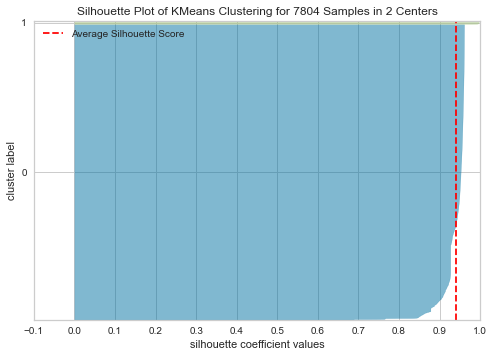

Silhouetter Score: 0.9414260626723774


In [127]:
silhouette_visualizer(collegekmeans2, collegeClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(collegeClean, cluster_college2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

2 clusters is not enough to distinguish the colleges.

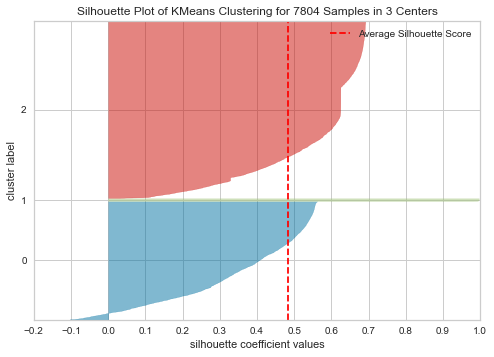

Silhouetter Score: 0.48364943994512977


In [124]:
# Try 3 clusters

collegekmeans3 = KMeans(n_clusters=3)
collegekmeans3.fit(collegeClean)
cluster_college3 = collegekmeans3.predict(collegeClean)
silhouette_visualizer(collegekmeans3, collegeClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(college_lcClean, cluster_college3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

3 clusters look good, green cluster is outlier, the other 2 clusters are not enough to distinguish the colleges.

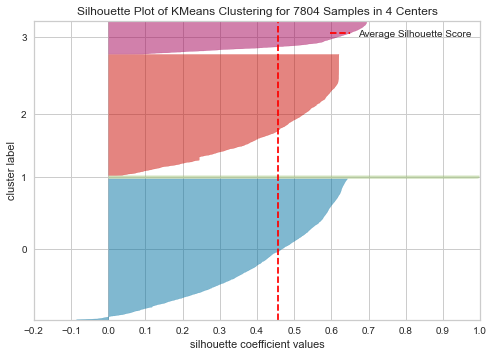

Silhouetter Score: 0.45708616012739145


In [125]:
# Try 4 clusters

collegekmeans4 = KMeans(n_clusters=4)
collegekmeans4.fit(collegeClean)
cluster_college4 = collegekmeans4.predict(collegeClean)
silhouette_visualizer(collegekmeans4, collegeClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(collegeClean, cluster_college4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

Except the green outlier cluster, the rest three clusters may be the best clustering.

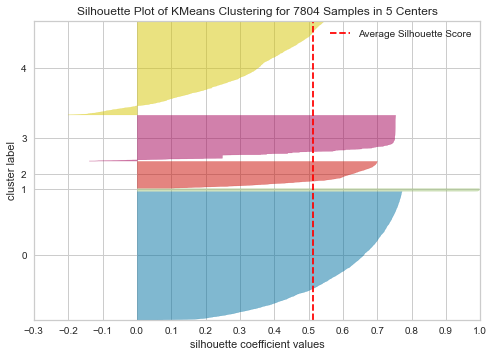

Silhouetter Score: 0.5139068253515313


In [126]:
# Try 5 clusters

collegekmeans5 = KMeans(n_clusters=5)
collegekmeans5.fit(collegeClean)
cluster_college5 = collegekmeans5.predict(collegeClean)
silhouette_visualizer(collegekmeans5, collegeClean, colors='yellowbrick')
silhouetteScore5 = silhouette_score(collegeClean, cluster_college5, metric='euclidean')
print('Silhouetter Score:', silhouetteScore5)

There are some negative coefficients. Although the silhouetter score is better, the '4 clusters' is the best choice

# 3 Result

In [130]:
college4cluster = collegeClean.copy(deep=True)

college4cluster['cluster'] = cluster_college4

college4cluster

,PREDDEG,LOCALE,LATITUDE,LONGITUDE,INC_PCT_LO,LO_INC_RPY_3YR_N,LO_INC_RPY_5YR_N,LO_INC_RPY_7YR_N,C150,COSTT4,cluster
0,3,12.0,34.7834,-86.5685,0,1225,1309,1706,0.2914,18888.0,0
1,3,12.0,33.5022,-86.8092,0,1748,1644,1976,0.5377,19990.0,0
2,3,12.0,32.3626,-86.1740,0,174,166,166,0.6667,12300.0,2
3,3,12.0,34.7228,-86.6384,0.488624612,883,798,758,0.4835,20306.0,0
4,3,12.0,32.3643,-86.2957,0.688963211,1885,1997,2190,0.2517,17400.0,0
...,...,...,...,...,...,...,...,...,...,...,...
7799,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0,2
7800,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0,2
7801,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0,2
7802,0,0.0,0.0000,0.0000,0,1682,1324,1282,0.0000,0.0,2


In [132]:
col_n = ['UNITID']
college_uid = pd.DataFrame(college,columns = col_n)
college_uid['cluster'] = cluster_college4
college_uid

,UNITID,cluster
0,100654,0
1,100663,0
2,100690,2
3,100706,0
4,100724,0
...,...,...
7799,48285703,2
7800,48285704,2
7801,48285705,2
7802,48285706,2
